# Laboratorio 04: Interpolación.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: ______
*Métodos computacionales 2025-I*

---

# 1.

Un automóvil que viaja a lo largo de una carretera recta es cronometrado en varios puntos. Los datos de las observaciones se dan en la siguiente tabla, donde el tiempo está en segundos, la distancia en metros y la velocidad en metros por segundo.

```
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo
```

- Usar un polinomio de Hermite y de Splines Cúbicos para predecir la posición del automóvil y su velocidad cuando $t=10$ s.
- ¿Cuál es la velocidad máxima predicha para el automóvil en cada caso?

In [110]:
#Aquí va su código
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo


# se hace la formula del polinomio de hermite
x = sp.Symbol("x")
def hermite_interpolation(x_points, y_points, derivatives):

    x = sp.symbols('x')  # Variable simbólica
    n = len(x_points)      # Número de puntos de interpolación
    H = 0                   # Inicializar el polinomio de Hermite

    for i in range(n):

        h_i = 1
        for j in range(n):
            if j != i:
                h_i *= (x - x_points[j]) / (x_points[i] - x_points[j])


        h_i_prime = sp.diff(h_i, x).subs(x, x_points[i])


        term1 = (h_i**2) * (1 - 2 * (x - x_points[i]) * h_i_prime) * y_points[i]
        term2 = (h_i**2) * (x - x_points[i]) * derivatives[i]
        H += term1 + term2

    return sp.simplify(H)

H = hermite_interpolation(tiempos,distancias,velocidades) # los tiempos serán las abcisas, las distancias las ordenadas y la derivada es la velocidad

sustitucion = H.subs(x,10) #sustituyo en hermite el valor simbolico de x por 10

print(f"la posición de hermite en el punto t = 10 es:")
print("")
display(sustitucion)
print("")
velocidad_evaluada= sp.diff(H,x)

velocidad_sustituida = velocidad_evaluada.subs(x,10)

print(f'la velocidad de hermite en el punto t=10 es:')
print("")
display(velocidad_sustituida)
print("")
#ahora el valor de la velocidad maxima

tiempos_array= np.linspace(0,13,1000)

H_deriv = sp.diff(H, x)

velocidades= [H_deriv.subs(x,t) for t in tiempos_array]
valor_maximo= np.max(velocidades)
print(f"la velocidad maxima en hermite es:")
print("")
display(valor_maximo)



la posición de hermite en el punto t = 10 es:



130502299/175760


la velocidad de hermite en el punto t=10 es:



510214439/10545600


la velocidad maxima en hermite es:



119.416346615473

In [111]:
#con cubit splines
from scipy.interpolate import CubicSpline

tiempos = np.array([0, 3, 5, 8, 13]) # segundos
distancias = np.array([0, 225, 383, 623, 993]) # metros
velocidades = np.array([75, 77, 80, 74, 72]) # metros/segundo

#defino la funcion cubico para la interpolacion

cubico= CubicSpline(tiempos,distancias)

#calculo la posicion
posicion_Sp_10 = cubico(10)

#hago una funcion velocidad derivando la anterior
velocidad_Sp= cubico.derivative()

#calculo la velocidad
vel_cubico_10= velocidad_Sp(10)

#printeo ambas
print(posicion_Sp_10)

print(vel_cubico_10)

#defino un rango de tiempos
tiempo = np.linspace(0, 13, 1000)

#calculo la velocidad en ese rango de tiempos
velocidad =velocidad_Sp(tiempo)

# Velocidad máxima
vel_max = np.max(velocidad)
print(vel_max)


778.4190647482014
75.82032374100719
80.26624598651843


# 2.
Los valores de la aceleración gravitacional $g$ dependen de la altitud $y$ según se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar el valor de la aceleración gravitacional a las altitudes de 5,000 m, 42,000 m y 90,000 m. Grafique la distribución de la función de interpolación obtenida junto con los datos dados.

```
y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²
```

In [101]:
#Aquí va su código

y = [0, 20000, 40000, 60000, 80000]  # en metros
g = [9.8100, 9.7487, 9.6879, 9.6278, 9.5682]  # en m/s²

def diferencia_dividida(x, y, i, j):
    if i == j:
        return y[i]
    else:
        num = diferencia_dividida(x, y, i + 1, j) - diferencia_dividida(x, y, i, j - 1)
        den = x[j] - x[i]
        return num / den

def coeficientes_a(x, y):
    n = len(x)
    coeficientes = np.zeros_like(x, dtype=float)
    for i in range(n):
        coeficientes[i] = diferencia_dividida(x, y, 0, i)
    return coeficientes

def Polinomio_Newton(x, y):
  coef = coeficientes_a(x, y)
  def P(x_val):
    resultado = coef[0]
    producto = 1
    for i in range(1, len(x)):
      producto *= (x_val - x[i - 1])
      resultado += coef[i] * producto
    return resultado
  return (P)

g(5000) = 9.79
g(42000) = 9.68
g(90000) = 9.54


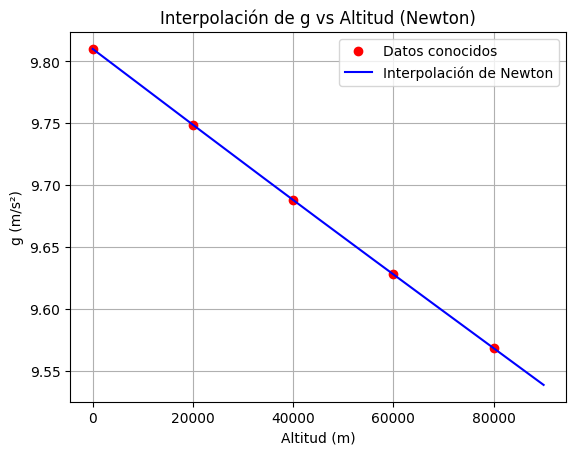

In [112]:
y = ([0, 20000, 40000, 60000, 80000])  # en metros
g = ([9.8100, 9.7487, 9.6879, 9.6278, 9.5682])  # en m/s²

Polinomio= Polinomio_Newton(y,g)
#ahora calculo las alturas despues de definir el polinomio

alturas= [5000,42000,90000]
for altura in alturas:
  print(f"g({altura}) = {Polinomio(altura):.2f}")


y_interp =  np.linspace(0,90000,1000)

g_interp =[Polinomio(yi) for yi in y_interp]

plt.plot(y, g, "ro", label="Datos conocidos")
plt.plot(y_interp, g_interp, 'b-', label="Interpolación de Newton")
plt.xlabel("Altitud (m)")
plt.ylabel("g (m/s²)")
plt.title("Interpolación de g vs Altitud (Newton)")
plt.grid(True)
plt.legend()
plt.show()


# 3.
La densidad del aire $\rho$ depende de la temperatura $T$ como se muestra en la tabla. Utilice el método de diferencias divididas de Newton para estimar los valores de la densidad del aire a 250 K, 800 K y 3,000 K. Luego, determine la densidad del aire a temperaturas desde 100 K hasta 2,500 K en intervalos de 10 K. Grafique la distribución de la densidad del aire calculada en función de la temperatura.

```
T = np.array([100, 200, 300, 500, 700, 1000, 1500, 2000, 2500]) # en K
rho = np.array([3.6010, 1.7684, 1.1774, 0.7048, 0.5030, 0.3524, 0.2355, 0.1762, 0.1394]) # en kg/m^3
```



In [ ]:
#Aquí va su código

# 4.
Uno de los dispositivos más precisos para medir temperatura es el termómetro de resistencia de platino, también conocido como RTD. En este dispositivo, un alambre delgado y largo de platino se enrolla alrededor de un carrete y se encapsula en una cubierta de acero inoxidable. La resistencia del alambre cambia de manera muy lineal con la temperatura. Una longitud típica de alambre tiene una resistencia de aproximadamente 100 $\Omega$ a $0^{\circ}$ C y cambia alrededor de 0.39 $\Omega/^{\circ}$ C. Por lo tanto, para medir temperaturas con precisión, es necesario poder medir cambios en la resistencia con alta resolución. Tradicionalmente, se ha utilizado el circuito de puente desequilibrado para esto, como se ilustra en la figura, el cual proporciona un voltaje de salida pequeño que es proporcional (aunque no linealmente) a la resistencia del sensor.

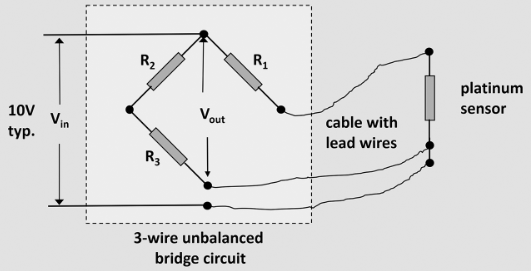




A continuación se presentan mediciones tomadas de dicho circuito, con $R_1 = R_2 = 5$ $k\Omega$ y $R_3 = 120$ $\Omega$:

```
resistencia = np.array([100, 115, 130, 145, 160, 175])  # Resistencia del sensor (Ohms)
voltaje = np.array([0.45244, 0.10592, -0.19918, -0.46988, -0.71167, -0.92896])  # Salida del puente (V)
```

Un termómetro de resistencia de platino estándar de 100 $\Omega$ tiene una resistencia de 139.27 $\Omega$ a $100^\circ$ C. Utilice el método de interpolación que desee para estimar el voltaje de salida del puente en estas condiciones. Si la salida del puente se mide en 0 voltios, estime la resistencia medida

In [ ]:
#Aquí va su código

# 5.
El índice de refracción del vidrio de borosilicato a diferentes longitudes de onda se presenta en la siguiente tabla. Estime la longitud de onda donde el índice de refracción es 1.520.

```
lambda_angstrom = np.array([6563, 6439, 5890, 5338, 5086, 4861, 4340, 3988])  # en Å
indice_refraccion = np.array([1.50883, 1.50917, 1.51124, 1.51386, 1.51534, 1.51690, 1.52136, 1.52546])
```

In [ ]:
#Aquí va su código